In [9]:
# import data
import pandas as pd
import matplotlib.pyplot as plt
mouse_meta_data_to_load= "Mouse_meta_data.csv"
study_results_to_load= "Study_results.csv"
# Read School and Student Data File and store into Pandas DataFrames
mouse_meta_data= pd.read_csv(mouse_meta_data_to_load)
study_results_data= pd.read_csv(study_results_to_load)

# Combined them 
mouse_data_complete =pd.merge(study_results_data,mouse_meta_data,how="left", on=["Mouse ID", "Mouse ID"])



In [7]:
# see data
study_results_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [10]:
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [32]:
#check for duplicates 
duplicate = mouse_data_complete.duplicated(subset = ["Mouse ID","Timepoint"], keep=False)
#list(duplicate).index(True)
mouse_data_complete['Timepoint'].nunique()
mouse_data_complete[duplicate]
# delete g989
clean_mouse_data=mouse_data_complete.loc[mouse_data_complete["Mouse ID"]!="g989"]
clean_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [53]:
# find mean, median variance, SD and SEM of the tumour volume for each drug 
drug_groups= clean_mouse_data.groupby("Drug Regimen")
mean = drug_groups["Tumor Volume (mm3)"].mean()
median= drug_groups["Tumor Volume (mm3)"].median()
var= drug_groups["Tumor Volume (mm3)"].var()
std=drug_groups["Tumor Volume (mm3)"].std()
sem = drug_groups["Tumor Volume (mm3)"].sem()
total_mice = drug_groups["Mouse ID"].count()

drug_group_df =pd.DataFrame({"Mean":mean, "Median":median, "Var":var, "Std":std, "Sem":sem, "Total Mice":total_mice})
drug_group_df.head()

,Mean,Median,Var,Std,Sem,Total Mice
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186


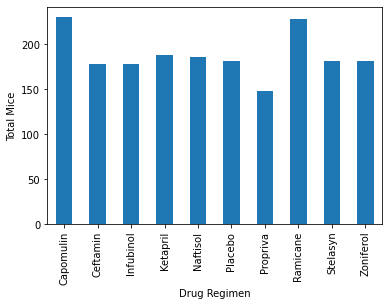

In [59]:
#Using .plot
drug_group_df["Total Mice"].plot.bar()
plt.ylabel("Total Mice")
plt.show()

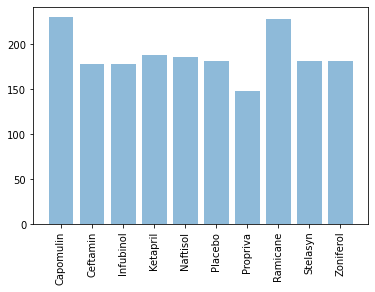

In [70]:
# Using pyplot 
plt.bar(drug_group_df.index,drug_group_df["Total Mice"], align='center', alpha=0.5)
plt.xticks(rotation=90)
plt.show()